In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv('../data/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

df

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1097,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

In [151]:
X_train.shape

(770, 1672)

In [152]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

import time
start = time.time()
y_pred = svm.predict(X_test)
print("Time taken: ", time.time() - start)

Time taken:  0.040281057357788086


In [153]:
accuracy_score(y_test, y_pred)*100 

89.39393939393939

In [181]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[161,   8],
       [ 33, 128]], dtype=int64)

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       169
           1       0.94      0.80      0.86       161

    accuracy                           0.88       330
   macro avg       0.89      0.87      0.87       330
weighted avg       0.88      0.88      0.87       330



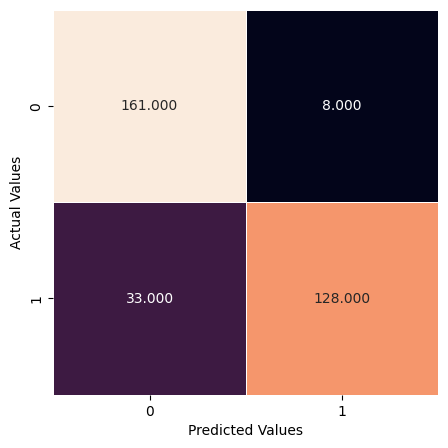

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [185]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [187]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [188]:
X_train_trf.shape

(770, 100)

In [189]:

svm = SVC(kernel="linear")
svm.fit(X_train_trf, y_train)

start = time.time()
y_pred = svm.predict(X_test_trf)
print("Time taken: ", time.time() - start)



Time taken:  0.0020418167114257812


In [194]:
accuracy_score(y_test, y_pred)*100

88.7878787878788

In [191]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[164,   5],
       [ 32, 129]], dtype=int64)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       169
           1       0.96      0.80      0.87       161

    accuracy                           0.89       330
   macro avg       0.90      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330



In [ ]:
# for i in range (1,1672):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)

#     svm = SVC(kernel="linear")
#     svm.fit(X_train_trf, y_train)

#     y_pred = svm.predict(X_test_trf)

#     print(accuracy_score(y_test, y_pred)*100)    

In [172]:
# tranforming to a 2D coordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [173]:
X_train_trf

array([[-4.12256742e-01,  1.07146311e-01, -1.19404381e+00],
       [-5.02329048e-01,  5.76603446e-02, -2.27092330e+00],
       [ 1.52635870e+00, -1.32930674e+00,  3.17405617e+00],
       ...,
       [-3.87435066e-01,  1.12475166e+00, -1.56147097e+00],
       [-5.24940844e-01,  1.71697873e-01, -2.60974018e+00],
       [-4.21836664e-01,  2.76333627e-03, -1.43965842e+00]])

In [170]:
# import plotly.express as px
# y_train_trf = y_train.astype(str)
# fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1], color=y_train_trf,
#                  color_discrete_sequence=px.colors.qualitative.G10)
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [174]:
pca.explained_variance_

array([18.87080263, 10.30412866,  8.60502747])

In [175]:
pca.components_.shape

(3, 1672)

In [176]:
pca.explained_variance_ratio_

array([0.04206762, 0.02297042, 0.01918271])

In [177]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [178]:
pca.explained_variance_

array([1.88708026e+01, 1.03041412e+01, 8.60575941e+00, 6.96648753e+00,
       6.61366079e+00, 6.06607266e+00, 5.84324122e+00, 5.47632251e+00,
       5.14790550e+00, 5.09577600e+00, 5.00660268e+00, 4.57735569e+00,
       4.52234466e+00, 4.42611659e+00, 4.24105680e+00, 4.17476432e+00,
       4.07193976e+00, 3.90408716e+00, 3.85838750e+00, 3.62763346e+00,
       3.50282455e+00, 3.47275853e+00, 3.41285455e+00, 3.31418608e+00,
       3.27550503e+00, 3.24884579e+00, 3.15003271e+00, 3.07351073e+00,
       3.04840888e+00, 2.99877842e+00, 2.96176215e+00, 2.91647360e+00,
       2.82565859e+00, 2.78998084e+00, 2.77102933e+00, 2.74479065e+00,
       2.71288523e+00, 2.66732448e+00, 2.62960157e+00, 2.56594214e+00,
       2.50963638e+00, 2.48255826e+00, 2.43800037e+00, 2.39102903e+00,
       2.36773464e+00, 2.34118993e+00, 2.31683858e+00, 2.30852398e+00,
       2.27910659e+00, 2.24883896e+00, 2.22496167e+00, 2.21472572e+00,
       2.20249956e+00, 2.18085930e+00, 2.16158465e+00, 2.15575222e+00,
      

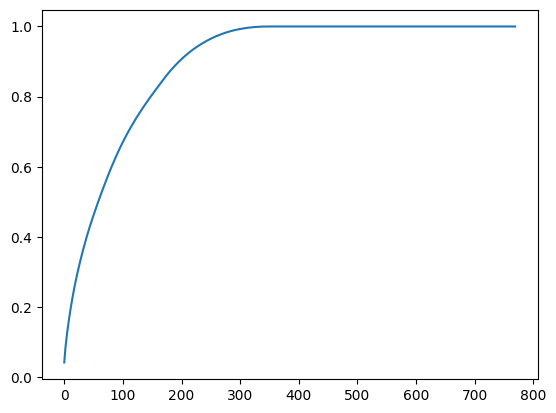

In [179]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))